<a href="https://colab.research.google.com/github/ALevertM/python_club_analysis_2025/blob/main/Week5_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib . pyplot as plt

In [ ]:
file_path = ('/content/drive/MyDrive/VCCRI_Python_Club_2025/data/pneumonia_recovery_dataset.csv')
df = pd.read_csv(file_path)

In [ ]:
df.rename(columns={'patient_id':'subject_id'}, inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
median_bmi = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median_bmi)

In [ ]:
df['sex'] = df['sex'].str.capitalize()

In [ ]:
df['age'] = pd.to_numeric(df['age'])

In [ ]:
mini_data = {
    'Category': ['A', 'B', 'A', 'B', 'B'],
    'Value': [60 , 50 , 70 , 80 , 90]
}
mini_df = pd.DataFrame(mini_data)
print(mini_df)

  Category  Value
0        A     60
1        B     50
2        A     70
3        B     80
4        B     90


In [ ]:
grouped_object = mini_df.groupby ('Category')
print(grouped_object)

In [ ]:
group_a = grouped_object.get_group('A')
print(group_a)

  Category  Value
0        A     60
2        A     70


In [ ]:
group_b = grouped_object.get_group('B')
print(group_b)

  Category  Value
1        B     50
3        B     80
4        B     90


In [ ]:
grouped_mean = mini_df.groupby('Category')['Value'].mean()
print(grouped_mean)

Category
A    65.000000
B    73.333333
Name: Value, dtype: float64


In [ ]:
mini_df.groupby('Category')['Value'].agg(['mean','sum','count','std'])

,mean,sum,count,std
Category,,,,
A,65.000000,130,2,7.071068
B,73.333333,220,3,20.816660


In [ ]:
mini_df['Sex'] = ['M','F','F','M','M']

In [ ]:
mini_df.head()

,Category,Value,sex,Sex
0,A,60,M,M
1,B,50,F,F
2,A,70,F,F
3,B,80,M,M
4,B,90,M,M


In [ ]:
mini_df.groupby(['Category','sex'])['Value'].mean()

Category  sex
A         F      70.0
          M      60.0
B         F      50.0
          M      85.0
Name: Value, dtype: float64

In [ ]:
mini_df.groupby(['Category','sex'])['Value'].agg(['mean','sum','count','std'])

mean  sum  count       std
Category sex                            
A        F    70.0   70      1       NaN
         M    60.0   60      1       NaN
B        F    50.0   50      1       NaN
         M    85.0  170      2  7.071068

In [ ]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

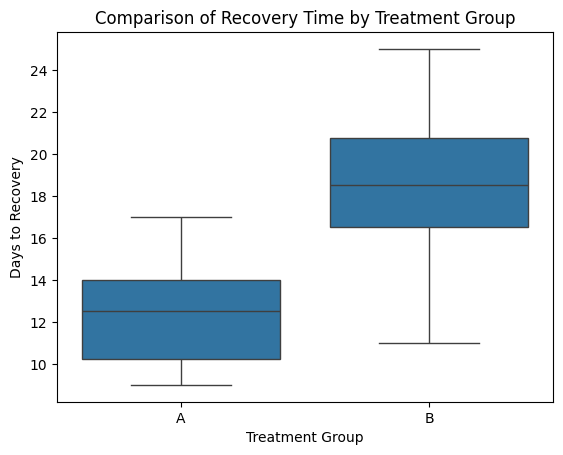

In [ ]:
sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
plt.title('Comparison of Recovery Time by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Recovery')
plt.show()

In [ ]:
df.groupby('treatment_group')['days_to_recovery'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment_group,,,,,,,,
A,10.0,12.5,2.549510,9.0,10.25,12.5,14.00,17.0
B,10.0,18.3,4.423423,11.0,16.50,18.5,20.75,25.0


In [ ]:
df.groupby(['treatment_group','sex'])['days_to_recovery'].mean()

treatment_group  sex   
A                Female    10.500
                 Male      13.000
B                Female    17.125
                 Male      23.000
Name: days_to_recovery, dtype: float64

In [ ]:
!pip install statannotations

In [2]:
from statannotations.Annotator import Annotator
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
plt.title('Recovery Time by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Recovery')
box_pairs = [("A","B")]
annotator = Annotator(ax, box_pairs, data=df, x='treatment_group', y='days_to_recovery')
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.show()
#text format can be either 'simple' for text or 'star' to show p value with stars

ModuleNotFoundError: No module named 'statannotations'

In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 14.3 MB/s eta 0:00:00


In [ ]:
import docx
from docx.shared import Inches
from scipy.stats import ttest_ind
from statannotations.Annotator import Annotator

group_a = df[df['treatment_group']=='A']
group_a

,subject_id,age,sex,bmi,blood_pressure_systolic,hemoglobin_level,c_reactive_protein,treatment_group,days_to_recovery
0,P001,68,Male,29.3,145,13.1,120,A,14
2,P003,52,Male,33.5,130,15.2,80,A,10
5,P006,58,Female,31.2,125,14.8,95,A,11
6,P007,65,Male,28.1,140,13.5,130,A,15
8,P009,56,Male,30.4,128,15.5,85,A,12
10,P011,63,Male,27.5,138,13.8,115,A,13
13,P013,54,Male,32.1,122,15.8,75,A,9
15,P015,73,Male,26.2,148,12.2,170,A,17
18,P018,57,Female,30.8,126,15.0,90,A,10
19,P019,66,Male,28.9,143,13.3,125,A,14


In [ ]:
import docx
from docx.shared import Inches
from scipy.stats import ttest_ind
from statannotations.Annotator import Annotator

group_a = df[df['treatment_group']=='A']['days_to_recovery']
group_b = df[df['treatment_group']=='B']['days_to_recovery']

In [ ]:
t_stat, p_val = ttest_ind(group_a, group_b)
p_val

np.float64(0.002082080165002606)

In [ ]:
if p_val < 0.001:
  p_text = 'p < 0.001'
else:
    p_text = f'p = {p_val:.4f}'
print(p_text)

p = 0.0021


In [1]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
plt.title('Comparison of Recovery Time')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Recovery')
box_pairs = [("A","B")]
annotator = Annotator(ax, box_pairs, data=df, x='treatment_group', y='days_to_recovery')
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.savefig('annotated_plot.png')
plt.close()
doc = docx.Document()
doc.add_heading('Pneumonia Recovery Study: Final Report', 0)
doc.add_heading('Results', level=1)
doc.add_paragraph(
    f"A statistically significant difference in recovery time was "
    f"observed between the two treatment groups. Patients in the "
    f"experimental group (A) recovered signficantly faster than "
    f"those in the standard group (B), as determined by "
    f"independent t-test ({p_text})"
)
doc.add_picture('annotated_plot.png', width=Inches(6.0))
doc.save('Final_Report_Dynamic.docx')

NameError: name 'plt' is not defined